### Importing Required Libraries


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

## Import The Dataset


In [68]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [69]:
df = pd.read_csv(filepath, header=0)

In [70]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [71]:
header = ["age", "gender", "bmi", "no_of_children",
          "smoker", "region", "charges"]
df.columns = header

df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [72]:
df.replace("?", np.nan, inplace=True)
df.shape

(2771, 7)

## Data Wrangling


In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [74]:
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


In [75]:
df['charges'] = np.round(df['charges'], 2)
print(df.head(5))

   age  gender     bmi  no_of_children  smoker  region   charges
0   18       2  33.770               1       0       4   1725.55
1   28       2  33.000               3       0       4   4449.46
2   33       2  22.705               0       0       1  21984.47
3   32       2  28.880               0       0       1   3866.86
4   31       1  25.740               0       0       4   3756.62


## Exploratory Data Analysis


(0.0, 54.9885)

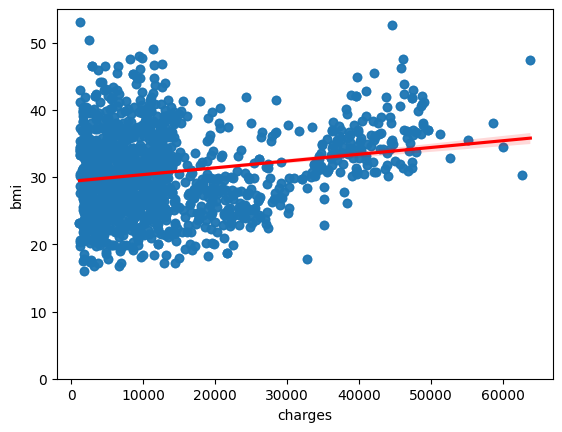

In [86]:
sns.regplot(x='charges', y='bmi', data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

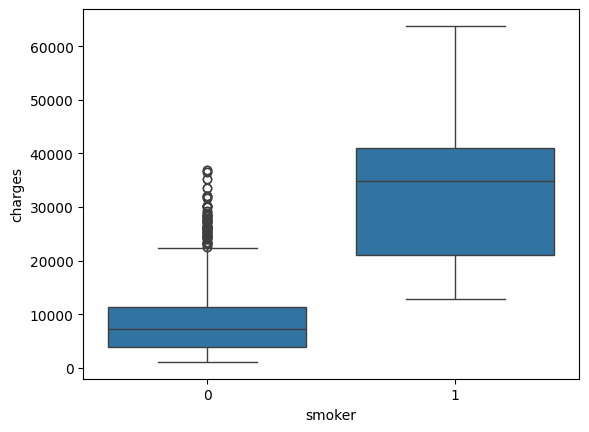

In [89]:
sns.boxplot(x='smoker', y='charges', data=df)

In [92]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


## Model Development


In [93]:
lr = LinearRegression()
x = df[['smoker']]
y = df['charges']
lr.fit(x, y)
print(lr.score(x, y))

0.6227430402464125


In [101]:
z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lr.fit(z, y)
print(lr.score(z, y))

0.7505888664568174


In [104]:
input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(
    include_bias=False)), ("model", LinearRegression())]

pipe = Pipeline(input)

z = z.astype(float)
pipe.fit(z, y)
ypipe = pipe.predict(z)
print(r2_score(y, ypipe))

0.8453716700171253


## Model Refinement


In [105]:
x_train, x_test, y_train, y_test = train_test_split(
    z, y, test_size=0.20, random_state=1)

In [106]:
rige = Ridge(alpha=0.1)
rige.fit(x_train, y_train)
yhat = rige.predict(x_test)
print(r2_score(y_test, yhat))

0.7254198858412229


In [107]:
poly = PolynomialFeatures(degree=2)
x_train_pr = poly.fit_transform(x_train)
x_test_pr = poly.fit_transform(x_test)
rige.fit(x_train_pr, y_train)
yhat = rige.predict(x_test_pr)
print(r2_score(y_test, yhat))

0.8208413195172471
